<a href="https://colab.research.google.com/github/zachfurie/zachfurie/blob/main/Liszt_Music_Generator_1_Copy2_(separate_note_and_dur_removed_pasted_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loading Music File  1 / 16 : /content/drive/MyDrive/Classical_Music_MIDI_Dataset/liszt/liz_et_trans8.mid
Loading Music File  2 / 16 : /content/drive/MyDrive/Classical_Music_MIDI_Dataset/liszt/liz_liebestraum.mid
Loading Music File  3 / 16 : /content/drive/MyDrive/Classical_Music_MIDI_Dataset/liszt/liz_rhap02.mid
Loading Music File  4 / 16 : /content/drive/MyDrive/Classical_Music_MIDI_Dataset/liszt/liz_et3.mid
Loading Music File  5 / 16 : /content/drive/MyDrive/Classical_Music_MIDI_Dataset/liszt/liz_donjuan.mid
Loading Music File  6 / 16 : /content/drive/MyDrive/Classical_Music_MIDI_Dataset/liszt/liz_et2.mid
Loading Music File  7 / 16 : /content/drive/MyDrive/Classical_Music_MIDI_Dataset/liszt/liz_et5.mid
Loading Music File  8 / 16 : /content/drive/MyDrive/Classical_Music_MIDI_Dataset/liszt/liz_et4.mid
Loading Music File  9 / 16 : /content/drive/MyDrive/Classical_Music_MIDI_Dataset/liszt/liz_et6.mid
Loading Music File  10 / 16 : /content/drive/MyDrive/Classical_Music_MIDI_Dataset/liszt/

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


(array([232.,  25.,  17.,  22.,  17.,  17.,  20.,   9.,   6.,   1.]),
 array([  1. ,  90.8, 180.6, 270.4, 360.2, 450. , 539.8, 629.6, 719.4,
        809.2, 899. ]),
 <a list of 10 Patch objects>)

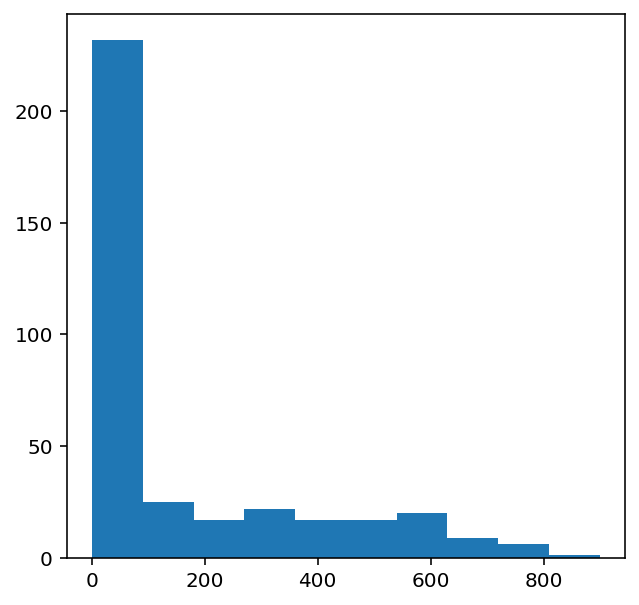

In [ ]:
from music21 import *
import numpy as np
import os


def read_midi(file,index,length):
    print("Loading Music File ",index+1,'/',length,":", file)
    notes = []
    durs = []
    notes_to_parse = None
    offset = 0
    # parsing a midi file
    midi = converter.parse(file)
    # grouping based on different instruments
    s2 = instrument.partitionByInstrument(midi)
    # Looping over all the instruments
    for part in s2.parts:
        # select elements of only piano
        if 'Piano' in str(part):
          notes_to_parse = part.recurse()
          # finding whether a particular element is note or a chord
          for element in notes_to_parse:
              if element.duration.type == 'zero':
                durat = 0.166666666
              else:
                durat = element.duration.quarterLength
              # note
              if isinstance(element, note.Note):
                  notes.append(str(element.pitch))
                  durs.append(float(durat))
                  #+'_'+str(element.offset-offset)
                  #offset = element.offset
              # chord
              elif isinstance(element, chord.Chord):
                  notes.append('.'.join(str(n) for n in element.normalOrder))
                  durs.append(float(durat))
                  #+'_'+str(element.offset-offset)
                  #offset = element.offset
    return np.array(notes), np.array(durs)


#specify the path

#Local Files:
#path='/Users/zachfurie/Downloads/LoFi_HipHop_MIDI_Dataset/'
#path='/Users/zachfurie/Downloads/Classical_Music_MIDI_Dataset/mozart/'
#path='/Users/zachfurie/Downloads/Classical_Music_MIDI_Dataset/liszt/'
#path='/Users/zachfurie/Desktop/Classical_Music_MIDI_Dataset_Single_Folder/'

#Drive Files:
#path='/content/drive/MyDrive/Classical_Music_MIDI_Dataset_Single_Folder/'
path='/content/drive/MyDrive/Classical_Music_MIDI_Dataset/liszt/'
#path='/content/drive/MyDrive/Classical_Music_MIDI_Dataset/mozart/'

#read all the filenames
files=[i for i in os.listdir(path) if i.endswith(".mid")]

#reading each midi file
notes_array = [] 
durs_array = []
for i in files:
 temp_n, temp_d = read_midi(path+i,files.index(i),len(files))
 notes_array.append(temp_n)
 durs_array.append(temp_d)

notes_array = np.array(notes_array) 
durs_array = np.array(durs_array) 


#converting 2D array into 1D array
notes_ = [element for note_ in notes_array for element in note_]
print('first 5 notes: ',notes_[0:5])
durs_ = [element for dur_ in durs_array for element in dur_]
print('first 5 durs: ',durs_[0:5])

#No. of unique notes
unique_notes = list(set(notes_))
print('Unique Notes: ',len(unique_notes))
unique_durs = list(set(durs_))
print('Unique Durs: ',len(unique_durs))

#importing library
from collections import Counter

#computing frequency of each note
freq = dict(Counter(notes_))
freq_d = dict(Counter(durs_))


#library for visualiation
import matplotlib.pyplot as plt

#consider only the frequencies
no=[count for _,count in freq.items()]

#set the figure size
plt.figure(figsize=(5,5))

#plot
plt.hist(no)


In [ ]:
#GET FREQUENT NOTES

frequent_notes = [note_ for note_, count in freq.items() if count>=50] #50
print(len(frequent_notes))

frequent_durs = [note_ for note_, count in freq_d.items() if count>=50] #50
print(len(frequent_durs))

160
12


In [ ]:
mozart_freq = ['C#5', 'A3', 'E4', 'D5', 'B3', '4.9', 'E5', '1.4', 'B4', 'G#3', '4.8', '11.4', 'A4', 'D3', '9.1', 'E3', '8.11', '9.1.4', 'E2', 'A2', 'C#4', 'F#5', 'D4', 'F#4', 'A5', 'G#5', '4', '9', '11', '1', '2', 'G#4', '2.4', 'C5', 'E-5', 'B-4', '2.6', '11.2', '0.3', '10.1', 'F#3', 'G#2', 'F5', '9.2', '6.9', 'G5', 'B2', 'C#3', 'E-4', 'E-3', 'F3', 'G3', 'B-3', 'C4', '9.0', '0', '3', '5', '8', '6', 'C3', 'F4', '0.4', '2.5', 'F2', 'B5', '8.0', 'C6', 'G4', 'C#6', 'D6', 'E-6', 'E6', '9.11', '7', '2.6.9', '4.7', '7.11', 'G2', '5.9', 'B-5', '7.10', 'B-2', 'F6', '5.10', '5.7', '7.0', '10.2', '10', '5.9.0', '3.7', '2.7', '5.8', '10.0']
double_freq = []
for k in frequent_notes:
  for j in mozart_freq:
    if k == j:
      double_freq.append(k)
print(len(double_freq))
print(double_freq)
frequent_notes = double_freq

93
['0', 'C3', '7', 'G3', '5', 'F3', '3', 'E-3', '2', 'D3', '0.3', '3.7', '11.2', 'G#2', 'G#3', 'G2', 'F2', '2.5', '5.8', '7.0', 'C4', 'D4', 'E-4', 'F4', 'G4', '5.10', 'B-3', 'B-2', '10.2', '8.0', '8.11', '2.7', 'B3', 'B2', '1.4', '0.4', 'E4', 'E3', 'C#4', 'C#3', 'F#4', 'F#3', 'G#4', 'C#5', 'E-5', 'F5', 'F#5', 'G#5', 'C#6', 'E-6', 'F6', '1', '11', '7.11', '9.0', '6', '9', 'A3', '8', 'G5', 'E6', 'E5', 'D6', 'D5', 'C6', 'C5', 'B5', 'B4', 'E2', '6.9', '11.4', '4.8', 'A4', '10.1', '4.7', '9.2', '2.6', 'B-4', 'B-5', '10', '4', '7.10', '4.9', 'A5', 'A2', '9.1', '5.9', '5.9.0', '2.6.9', '9.11', '9.1.4', '5.7', '2.4']


In [ ]:
mozart_durs = [0.75, 1.0, 0.25, 0.5, 1.5, 0.3333333333333333, 0.166666666, 3.0, 2.0, 1.25, 0.6666666666666666, 4.0]
double_durs = []
for k in frequent_durs:
  for j in mozart_durs:
    if k == j:
      double_durs.append(k)
print(len(double_durs))
print(double_durs)
frequent_durs = double_durs

11
[0.5, 0.25, 0.166666666, 1.5, 0.75, 3.0, 0.3333333333333333, 1.0, 2.0, 1.25, 0.6666666666666666]


(array([24.,  2.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.]),
 array([1.00000e+00, 2.29550e+03, 4.59000e+03, 6.88450e+03, 9.17900e+03,
        1.14735e+04, 1.37680e+04, 1.60625e+04, 1.83570e+04, 2.06515e+04,
        2.29460e+04]),
 <a list of 10 Patch objects>)

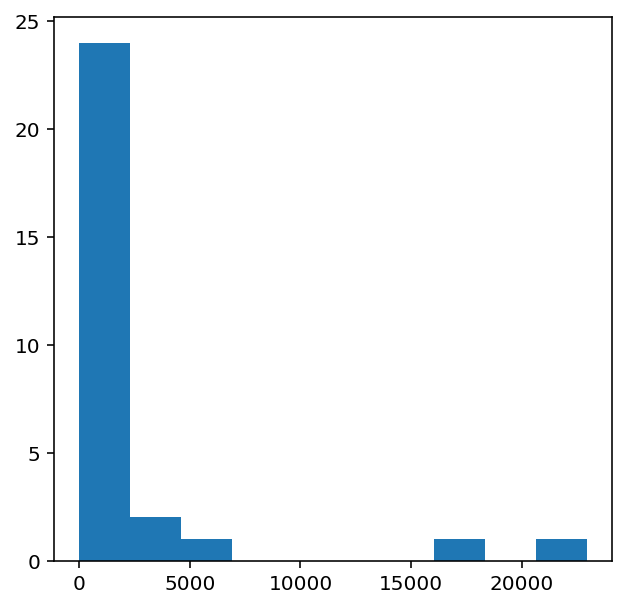

In [ ]:
#library for visualiation
import matplotlib.pyplot as plt

#consider only the frequencies
no=[count for _,count in freq_d.items()]

#set the figure size
plt.figure(figsize=(5,5))

#plot
plt.hist(no)

In [ ]:
print(durs_)

[0.5, 0.25, 0.5, 0.25, 0.5, 0.25, 0.5, 0.25, 0.5, 0.25, 0.5, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.5, 0.25, 0.5, 0.25, 0.5, 0.25, 0.5, 0.25, 0.5, 0.25, 0.5, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.166666666, 0.166666666, 0.166666666, 0.166666666, 0.166666666, 0.166666666, 0.166666666, 0.166666666, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.166666666, 0.166666666, 0.166666666, 0.166666666, 0.166666666, 0.166666666, 0.166666666, 0.166666666, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.166666666, 0.166666666, 0.166666666, 0.166666666, 0.166666666, 0.166666666, 0.166666666, 0.166666666, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.166666666, 0.166666666, 0.166666666, 0.166666666, 0.166666666, 0.166666666, 0.166666666, 0.166666666, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.166666666, 0.166666666, 0.166

In [ ]:
#Remove infrequent notes from each song

def remove_infrequent_items(notes_array, frequent_notes):
  new_music=[]

  for notes in notes_array:
      temp=[]
      for note_ in notes:
          if note_ in frequent_notes:
              temp.append(note_)            
      new_music.append(temp)
      
  new_music = np.array(new_music, dtype=object)
  return new_music

new_durs = remove_infrequent_items(durs_array, frequent_durs) 
new_music = remove_infrequent_items(notes_array, frequent_notes) 


(16,)


In [ ]:
print(new_music[0])

['0', 'C3', '7', 'G3', '5', 'F3', '3', 'E-3', '2', 'D3', '0', 'C3', '0.3', '3.7', '3.7', '11.2', '11.2', 'G#2', 'G#3', 'G2', 'G3', 'F2', 'F3', 'E-3', 'D3', '2.5', '5.8', '5.8', '3.7', '7.0', 'C4', 'D4', 'C3', 'D3', 'E-4', 'E-3', 'F4', 'F3', 'G4', 'G3', '5.8', '0.3', '5.8', '5.10', 'F4', 'F3', 'E-4', 'E-3', 'D4', 'C4', 'D3', 'C3', 'B-3', 'B-2', '10.2', '3.7', '3.7', 'G#3', 'B-3', 'G#2', 'B-2', 'C4', 'C3', 'D4', 'D3', 'E-4', 'E-3', '2.5', '8.0', '2.5', '8.11', '2.7', 'D4', 'D3', 'C4', 'C3', 'B3', 'G#3', 'B2', 'G#2', 'G3', 'G2', '1.4', '0.4', '8.0', 'B3', 'C4', 'B2', 'C3', 'D4', 'D3', 'E4', 'E3', 'F4', 'F3', '5.8', 'C#4', 'C#3', 'E-4', 'E-3', 'F4', 'F#4', 'F3', 'F#3', 'G#4', 'G#3', 'C#5', 'C#4', 'E-5', 'E-4', 'F5', 'F#5', 'F4', 'F#4', 'G#5', 'G#4', 'C#6', 'C#5', 'E-6', 'E-5', 'F6', 'F5', 'F#5', 'G#5', '5.8', '5.8', '5.8', '1', '1', '2', '2', '11', '11', '0', '0', '7.11', 'D3', 'C3', 'B2', 'G#2', 'G2', '0.3', '0.3', '9.0', '9.0', '6', '3', '2', '0', '7.11', 'D3', 'C3', 'B2', 'G#2', 'G2', '

In [ ]:
#Create segments of length 32

def timesteps(new_music):
  no_of_timesteps = 32
  x = []
  y = []

  for note_ in new_music:
      for i in range(0, len(note_) - no_of_timesteps, 1):
          
          #preparing input and output sequences
          input_ = note_[i:i + no_of_timesteps]
          output = note_[i + no_of_timesteps]
          
          x.append(input_)
          y.append(output)
          
  x=np.array(x)
  y=np.array(y)
  return x, y

x_n, y_n = timesteps(new_music)
x_d, y_d = timesteps(new_durs)



In [ ]:
#Create dictionary to convert notes to ints

def unique_and_nti(x, uni):
  unique_x = uni    #list(set(x.ravel()))
  x_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_x))
  return unique_x, x_note_to_int

unique_x_n, x_note_to_int_n = unique_and_nti(x_n, frequent_notes)
#unique_x_d, x_note_to_int_d = unique_and_nti(x_d, frequent_durs)

In [ ]:
#Prepare input sequences

def prepseq(x, x_note_to_int):
  x_seq=[]
  for i in x:
      temp=[]
      for j in i:
          #assign unique integer to every note
          temp.append(x_note_to_int[j])
      x_seq.append(temp)
      
  x_seq = np.array(x_seq)
  return x_seq

x_seq_n = prepseq(x_n, x_note_to_int_n)
x_seq_d = np.asarray(x_d)

In [ ]:
#Create dictionary for notes in y (prob can just create 1 dictionary for x and y)

def unique_y_func(y):
  unique_y = list(set(y))
  y_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_y)) 
  y_seq=np.array([y_note_to_int[i] for i in y])
  return unique_y, y_note_to_int, y_seq

#unique_y_n, y_note_to_int_n, y_seq_n = unique_y_func(y_n)
#unique_y_d, y_note_to_int_d, y_seq_d = unique_y_func(y_d)
y_seq_d = np.asarray(y_d)
unique_y_n = frequent_notes
y_note_to_int_n = x_note_to_int_n
y_seq_n = np.array([y_note_to_int_n[i] for i in y_n])



In [ ]:
#Train Test Split

from sklearn.model_selection import train_test_split
#x_tr, x_val, y_tr, y_val = train_test_split(x_seq,y_seq,test_size=0.2,random_state=0)

x_tr_n, x_val_n, y_tr_n, y_val_n = train_test_split(x_seq_n,y_seq_n,test_size=0.2,random_state=0)
x_tr_d, x_val_d, y_tr_d, y_val_d = train_test_split(x_seq_d,y_seq_d,test_size=0.2,random_state=0)

In [ ]:
#Create Model for Notes

from keras.layers import *
from keras.models import *
from keras.callbacks import *
import keras.backend as K

K.clear_session()
model = Sequential()
    
#embedding layer
model.add(Embedding(len(unique_x_n), 100, input_length=32,trainable=True)) 

model.add(Conv1D(64,3, padding='causal',activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))
    
model.add(Conv1D(128,3,activation='relu',dilation_rate=2,padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))

model.add(Conv1D(256,3,activation='relu',dilation_rate=4,padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))
          
#model.add(Conv1D(256,5,activation='relu'))    
model.add(GlobalMaxPool1D())
    
model.add(Dense(256, activation='relu'))
model.add(Dense(len(unique_y_n), activation='softmax'))
    
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 32, 100)           9300      
_________________________________________________________________
conv1d (Conv1D)              (None, 32, 64)            19264     
_________________________________________________________________
dropout (Dropout)            (None, 32, 64)            0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 16, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 16, 128)           24704     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 128)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 8, 128)            0

In [ ]:
#Set early stopping and checkpoint of model

mc_n = [EarlyStopping(monitor='val_loss', patience=5, mode='min', min_delta=0.0001),
      ModelCheckpoint('best_model_n.h5', monitor='val_loss', mode='min', save_best_only=True,
                   verbose=1)]

In [ ]:
#Train model on notes

history_n = model.fit(np.array(x_tr_n),np.array(y_tr_n),batch_size=128,epochs=50, validation_data=(np.array(x_val_n),np.array(y_val_n)),verbose=1, callbacks=[mc_n])


Epoch 1/50
261/261 [==============================] - 21s 80ms/step - loss: 2.5160 - val_loss: 3.1242

Epoch 00001: val_loss did not improve from 3.11998
Epoch 2/50
261/261 [==============================] - 21s 80ms/step - loss: 2.5015 - val_loss: 3.1251

Epoch 00002: val_loss did not improve from 3.11998
Epoch 3/50
261/261 [==============================] - 23s 87ms/step - loss: 2.4909 - val_loss: 3.1249

Epoch 00003: val_loss did not improve from 3.11998
Epoch 4/50
261/261 [==============================] - 21s 80ms/step - loss: 2.4853 - val_loss: 3.1192

Epoch 00004: val_loss improved from 3.11998 to 3.11916, saving model to best_model_n.h5
Epoch 5/50
261/261 [==============================] - 21s 80ms/step - loss: 2.4744 - val_loss: 3.1131

Epoch 00005: val_loss improved from 3.11916 to 3.11311, saving model to best_model_n.h5
Epoch 6/50
261/261 [==============================] - 21s 80ms/step - loss: 2.4642 - val_loss: 3.1148

Epoch 00006: val_loss did not improve from 3.11311
Ep

In [ ]:
#Save x_val of notes and durs, Save note model

from google.colab import files
saveFile = open("x_val_n_liszt.txt", "w")
for val in x_val_n:
  saveFile.write(str(val)+',')
files.download('x_val_n_liszt.txt') 
saveFile = open("x_val_d_liszt.txt", "w")
for val in x_val_d:
  saveFile.write(str(val)+',')
files.download('x_val_d_liszt.txt')
files.download('best_model_n.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

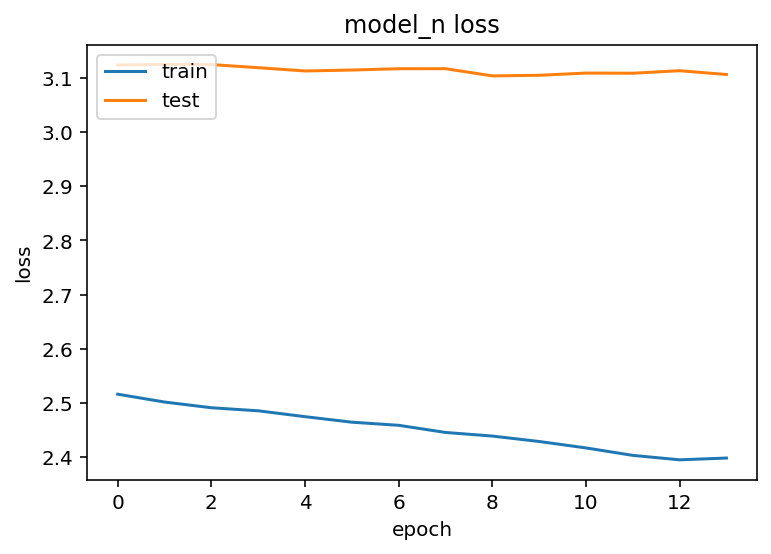

In [ ]:
# summarize history for loss

plt.plot(history_n.history['loss'])
plt.plot(history_n.history['val_loss'])
plt.title('model_n loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#Reshape duration data for model

x_tr_d = np.asarray(x_tr_d)
x_tr_d = np.expand_dims(x_tr_d, -1)

x_val_d = np.asarray(x_val_d)
x_val_d = np.expand_dims(x_val_d, -1)


In [ ]:
unique_y_d = frequent_durs

In [ ]:
#Create Model for Durs

from keras.layers import *
from keras.models import *
from keras.callbacks import *
import keras.backend as K

K.clear_session()
model_d = Sequential()
    
#embedding layer
#model_d.add(Input((None,32, 1))) #, 100, input_length=32,trainable=True)
#model_d.add(Embedding(len(unique_x_d), 100, input_length=32,trainable=True)) 

model_d.add(Conv1D(64,3, padding='causal',activation='relu', input_shape=(32,1))) #input_shape=(32,1,),,return_sequences=True)
model_d.add(Dropout(0.2))
model_d.add(MaxPool1D(2))
    
model_d.add(Conv1D(128,3,activation='relu',dilation_rate=2,padding='causal'))
model_d.add(Dropout(0.2))
model_d.add(MaxPool1D(2))

model_d.add(Conv1D(256,3,activation='relu',dilation_rate=4,padding='causal'))
model_d.add(Dropout(0.2))
model_d.add(MaxPool1D(2))
          
#model.add(Conv1D(256,5,activation='relu'))    
model_d.add(GlobalMaxPool1D())
    
model_d.add(Dense(256, activation='relu'))
model_d.add(Dense(len(unique_y_d), activation='softmax'))
    
model_d.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

model_d.summary()



#Set early stopping and checkpoint of model

mc_d = [EarlyStopping(monitor='val_loss', patience=5, mode='min', min_delta=0.0001),
      ModelCheckpoint('best_model_d.h5', monitor='val_loss', mode='min', save_best_only=True,
                   verbose=1)]



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 32, 64)            256       
_________________________________________________________________
dropout (Dropout)            (None, 32, 64)            0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 16, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 16, 128)           24704     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 128)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 8, 128)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 8, 256)            9

In [ ]:
#Train model on durs

history_d = model_d.fit(np.array(x_tr_d),np.array(y_tr_d),batch_size=128,epochs=50, validation_data=(np.array(x_val_d),np.array(y_val_d)),verbose=1, callbacks=[mc_d])


Epoch 1/50
343/343 [==============================] - 23s 64ms/step - loss: 0.3286 - val_loss: 0.2945

Epoch 00001: val_loss improved from inf to 0.29445, saving model to best_model_d.h5
Epoch 2/50
343/343 [==============================] - 22s 64ms/step - loss: 0.2521 - val_loss: 0.2918

Epoch 00002: val_loss improved from 0.29445 to 0.29177, saving model to best_model_d.h5
Epoch 3/50
343/343 [==============================] - 22s 64ms/step - loss: 0.2467 - val_loss: 0.3116

Epoch 00003: val_loss did not improve from 0.29177
Epoch 4/50
343/343 [==============================] - 22s 63ms/step - loss: 0.2438 - val_loss: 0.3442

Epoch 00004: val_loss did not improve from 0.29177
Epoch 5/50
343/343 [==============================] - 22s 63ms/step - loss: 0.2389 - val_loss: 0.2737

Epoch 00005: val_loss improved from 0.29177 to 0.27365, saving model to best_model_d.h5
Epoch 6/50
343/343 [==============================] - 22s 63ms/step - loss: 0.2363 - val_loss: 0.2754

Epoch 00006: val_los

Exception ignored in: <function IteratorResourceDeleter.__del__ at 0x7fe0655218c0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/iterator_ops.py", line 546, in __del__
    handle=self._handle, deleter=self._deleter)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/gen_dataset_ops.py", line 1264, in delete_iterator
    _ctx, "DeleteIterator", name, handle, deleter)
KeyboardInterrupt: 


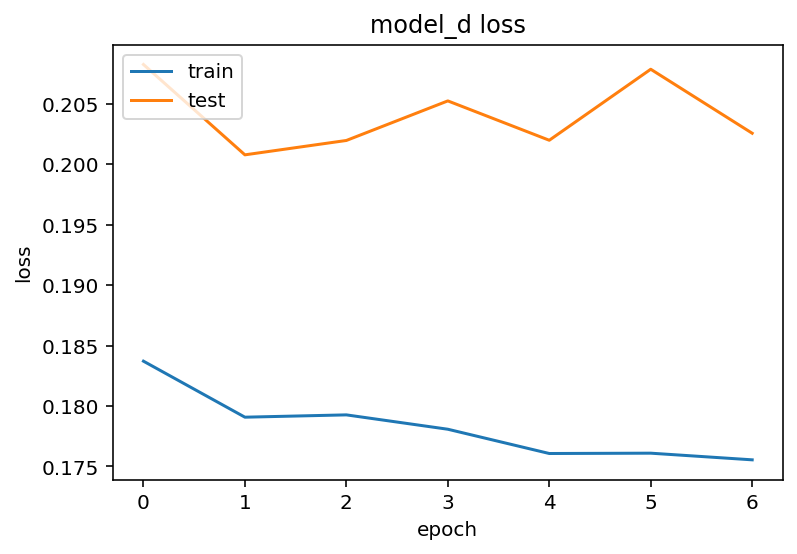

In [ ]:
# summarize history for loss
plt.plot(history_d.history['loss'])
plt.plot(history_d.history['val_loss'])
plt.title('model_d loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#backup data to files on drive

#from google.colab import files
saveFile = open("unique_x_n_liszt.txt", "w")
for val in unique_x_n:
  saveFile.write(str(val)+',')
files.download('unique_x_n_liszt.txt') 

saveFile = open("unique_y_d_liszt.txt", "w")
for val in unique_y_d:
  saveFile.write(str(val)+',')
files.download('unique_y_d_liszt.txt')

files.download('best_model_d.h5')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#load best model
from keras.models import load_model
model_n = load_model('best_model_n.h5')
model_d = load_model('best_model_d.h5')
import pandas as pd
#x_val_n = pd.read_csv('x_val_n_save.txt')


In [ ]:
#Import data (if using data from a previous session, start here)

#file1 = open('x_val_d_save.txt', 'r')
#x_val_d = file1.read()
#file1.close()

#file2 = open('x_val_n_save.txt', 'r')
#x_val_n = file2.read()
#file2.close()


In [ ]:
def save_to_list(x_val_d, typee):
  timestep_segs = x_val_d.split(',')
  lister = []
  np.asarray(lister, dtype=object)
  for seg in timestep_segs:
    segg = seg
    np.asarray(segg, dtype = object)
    temp = segg.strip('[')
    temp1 = temp.strip(']')
    temp2 = temp.split(' ')

    indlist = []
    for item in range(len(temp2)):
      if temp2[item] == '':
        indlist.append(item)
    indlist.reverse()
    for i in indlist:
      temp2.pop(i)

    if len(temp2) != 32 and len(temp2) != 33:
      print(len(temp2))
    for i in range(len(temp2)): #32
      item = temp2[i]
      item = item.strip()
      item = item.strip('[')
      item = item.strip(']')
      if item != '' and item != '[' and item != ']':
        if typee == 'float':
          temp2[i] = float(item)
        elif typee == 'int':
          temp2[i] = int(item)

    #print(np.shape(temp2))
    if len(temp2) != 0:
      if len(temp2) != 32:
        temp2.pop()
      lister.append(temp2)

  print(np.shape(lister))
  return lister


In [ ]:
mozart_notes_full = [42, 17, 77, 42, 24, 42, 24, 24, 24, 42, 66, 24, 24, 22, 22, 22, 22, 77, 77, 77, 77, 77, 20, 77, 77, 77, 44, 25, 25, 45, 42, 44]
mozart_durs_full = [0.5, 0.5, 0.25, 0.5, 0.5, 0.5, 0.5, 0.5, 0, 0.5, 0.5, 0.166666666, 0.5, 0.5, 0.5, 0.5, 0.5, 0, 0.5, 0.5, 0.5, 0.5, 0.5, 0, 0.5, 0.5, 0.5, 0.5, 0.5, 0, 0.5, 0.5]
mozart_notes = mozart_notes_full[-32:]
mozart_durs = mozart_durs_full[-32:]


In [ ]:
#GENERATE PREDICTIONS

import random
import numpy as np
no_of_timesteps = 32

def rand_gen_n(x_val, model):
  ind = np.random.randint(0,len(x_val)-1)

  random_music = x_val[ind]

  random_music = mozart_notes

  predictions=[]
  for i in range(32):

      random_music = np.array(random_music).reshape(1,no_of_timesteps)
      prob  = model.predict(random_music)[0]
      y_pred= np.argmax(prob,axis=0)

      #new test
      while len(predictions) > 5 and all(y_pred == elem for elem in predictions[-5:]):
        prob = np.delete(prob,np.argmax(prob,axis=0))
        y_pred= np.argmax(prob,axis=0)
      
      predictions.append(y_pred)

      random_music = np.insert(random_music[0],len(random_music[0]),y_pred)
      random_music = random_music[1:]
  print('Notes: ', predictions)
  return predictions

def rand_gen_d(x_val, model):
  ind = np.random.randint(0,len(x_val)-1)
  random_music = x_val[ind]
  #random_music = mozart_durs.   #If blending with another composer, use this random_music instead


  predictions=[]
  for i in range(32):

      random_music = np.array(random_music).reshape(1,no_of_timesteps)
      random_music = np.expand_dims(random_music, -1)

      prob = model.predict(random_music)[0]
      
      y_pred = np.argmax(prob,axis=0)
      y_pred = unique_y_d[y_pred]

      #new test
      while len(predictions) > 5 and all(y_pred == elem for elem in predictions[-5:]):
        prob = np.delete(prob,np.argmax(prob,axis=0))
        y_pred= np.argmax(prob,axis=0)
      
      if float(y_pred) < float(0.1):
        y_pred == float(0.25)
      if y_pred == 0:
        y_pred == float(0.25)

      predictions.append(y_pred)

      random_music = np.insert(random_music[0],len(random_music[0]),y_pred)
      random_music = random_music[1:]
  print('Durs: ',predictions)
  return predictions

predictions_n = rand_gen_n(np.asarray(x_val_n), model_n) 
predictions_d = rand_gen_d(np.asarray(x_val_d), model_d)


Notes:  [81, 81, 81, 81, 81, 10, 25, 25, 25, 25, 11, 25, 25, 11, 11, 11, 11, 11, 80, 11, 28, 28, 28, 28, 28, 17, 27, 25, 25, 25, 11, 11]
Durs:  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0, 0.5, 0.5, 0.5, 0.5, 0.5, 0, 0.5, 0.5, 0.5, 0.5, 0.5, 0, 0.5, 0.5, 0.5, 0.5, 0.5, 0, 0.5, 0.5, 0.5, 0.5, 0.5, 0, 0.5]


In [ ]:
predictions_d = mozart_durs_full + predictions_d
predictions_n = mozart_notes_full + predictions_n
predicted_notes_d = predictions_d

In [ ]:
print(predictions_n)

[42, 17, 77, 42, 24, 42, 24, 24, 24, 42, 66, 24, 24, 22, 22, 22, 22, 77, 77, 77, 77, 77, 20, 77, 77, 77, 44, 25, 25, 45, 42, 44, 81, 81, 81, 81, 81, 10, 25, 25, 25, 25, 11, 25, 25, 11, 11, 11, 11, 11, 80, 11, 28, 28, 28, 28, 28, 17, 27, 25, 25, 25, 11, 11]


In [ ]:
def prep(unique_x, predictions):
  x_int_to_note = dict((number, note_) for number, note_ in enumerate(unique_x)) 
  predicted_notes = [x_int_to_note[i] for i in predictions]
  return predicted_notes

predicted_notes_n = prep(unique_x_n, predictions_n)
predicted_notes_d = predictions_d

print(predicted_notes_n)
print(predicted_notes_d)

['G#4', '2.5', 'B-4', 'G#4', 'G4', 'G#4', 'G4', 'G4', 'G4', 'G#4', 'B5', 'G4', 'G4', 'E-4', 'E-4', 'E-4', 'E-4', 'B-4', 'B-4', 'B-4', 'B-4', 'B-4', 'C4', 'B-4', 'B-4', 'B-4', 'E-5', '5.10', '5.10', 'F5', 'G#4', 'E-5', '7.10', '7.10', '7.10', '7.10', '7.10', '0.3', '5.10', '5.10', '5.10', '5.10', '3.7', '5.10', '5.10', '3.7', '3.7', '3.7', '3.7', '3.7', '4', '3.7', '10.2', '10.2', '10.2', '10.2', '10.2', '2.5', 'B-2', '5.10', '5.10', '5.10', '3.7', '3.7']
[0.5, 0.5, 0.25, 0.5, 0.5, 0.5, 0.5, 0.5, 0, 0.5, 0.5, 0.166666666, 0.5, 0.5, 0.5, 0.5, 0.5, 0, 0.5, 0.5, 0.5, 0.5, 0.5, 0, 0.5, 0.5, 0.5, 0.5, 0.5, 0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0, 0.5, 0.5, 0.5, 0.5, 0.5, 0, 0.5, 0.5, 0.5, 0.5, 0.5, 0, 0.5, 0.5, 0.5, 0.5, 0.5, 0, 0.5, 0.5, 0.5, 0.5, 0.5, 0, 0.5]


In [ ]:
from fractions import Fraction

def offset_calc(offset=0, offs=0, prevnote=None):
    if prevnote == None:
      return offset + offs #+ 0.5
      #return offset + 1
    else:
      return offset + offs + prevnote.duration.quarterLength #+ 0.1

def convert_to_midi(prediction_output_n, prediction_output_d):
   
    offset = 0
    offs = 0
    output_notes = []

    prevnote = None

    # create note and chord objects based on the values generated by the model
    for pattern_ind in range(len(prediction_output_n)):
        pattern = prediction_output_n[pattern_ind]
        durat = prediction_output_d[pattern_ind]
        if durat == 0:
          durat = 1.0
        if durat == 1:
          durat = 1.0
        if durat == 2:
          durat = 2.0
        # pattern is a chord
        if ('.' in pattern) or pattern.isdigit():
            notes_in_chord = pattern.split('.')
            notes = []
            for current_note in notes_in_chord:
                
                cn=int(current_note)
                new_note = note.Note(cn)
                new_note.storedInstrument = instrument.Piano()
                notes.append(new_note)
                
            new_chord = chord.Chord(notes)
            new_chord.offset = offset_calc(offset,offs, prevnote)
            offset = new_chord.offset
            new_chord.duration.quarterLength = durat
            output_notes.append(new_chord)

            prevnote = new_chord
            
        # pattern is a note
        else:
            
            new_note = note.Note(pattern)
            new_note.offset = offset_calc(offset,offs, prevnote)
            offset = new_note.offset
            new_note.storedInstrument = instrument.Piano()
            new_note.duration.quarterLength = durat
            output_notes.append(new_note)

            prevnote = new_note

        # increase offset each iteration so that notes do not stack
        #offset += 1

    midi_stream = stream.Stream(output_notes)
    midi_stream.write('midi', fp='music.mid')

    #for downloading from google colab:
    from google.colab import files
    files.download('music.mid') 

    for x in output_notes[0:10]:
        print(x,' ',x.duration.quarterLength,' ',x.offset)

In [ ]:
convert_to_midi(predicted_notes_n, predicted_notes_d)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<music21.note.Note G#>   0.5   0.0
<music21.chord.Chord D F>   0.5   0.5
<music21.note.Note B->   0.25   1.0
<music21.note.Note G#>   0.5   1.25
<music21.note.Note G>   0.5   1.75
<music21.note.Note G#>   0.5   2.25
<music21.note.Note G>   0.5   2.75
<music21.note.Note G>   0.5   3.25
<music21.note.Note G>   1.0   3.75
<music21.note.Note G#>   0.5   4.75
